# Automatic Differentiation
_Autograd_ as we pass data through each successive function, the framework buildds a _computational graph_ that tracks how each value depends on others. To calculate derivatives, automatic differentiation works backwards through this graph applying the chain rule. The computational algorithm for applying the chain rule in this fashion is called _backpropagation_.

### Simple function
Differentiating the function $y=2\mathbf{x}^T\mathbf{x}$ with respect to the colum vector \mathbf{x}

In [3]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

Before calculate the gradient of $y$ with respect to $x$ we need a place to store it, in general we avoid allocating new memory every time because deep learning requires successively computing derivatives with respect to the same parameters great many times

In [4]:
x.requires_grad_(True) # equals to x = torch.arange(4.0, requires_grade=True)
x.grad

We now calculate our function of x adn assign the result to y

In [6]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

We can now take the gradient of y with respect to x by calling its backward method. Next we can access the gradient via x's `grad` attribute

In [7]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

So the gradient of the function should be $4\mathbf{x}$, so we can verify that the automatic gradient computtion and the expected result are identical

In [8]:
x.grad == 4 *x

tensor([True, True, True, True])

To reset the gradient __buffer__

In [9]:
x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### Gradients and Python Control Flow
A function such as z = x * x * x. Programming offers us a lor more freedom in how we compute results. For instance we can make them depend on auxiliary variables or condition choices on intermediate results.   

In [11]:
def f(a):
    b = a**2
    while b.norm() < 1000:
        b=b*2
    if b.sum() > 0:
        c = b
    else: 
        c=100*b
    return c

Since the input is a random variable we do not know what form the computational graph will take.

In [21]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

(i) attach gradients to those variables with respect to which we desire derivatives; 

(ii) record the computation of the target value; 

(iii) execute the backpropagation function; and 

(iv) access the resulting gradient.

### Exercises

Let $f(x)=\sin(x)$. Plot the graph of $f$ and of its derivative $f'$. Do not exploit the fact that $f'(x)=\cos(x)$ but rather use automatic differentiation to get the result.

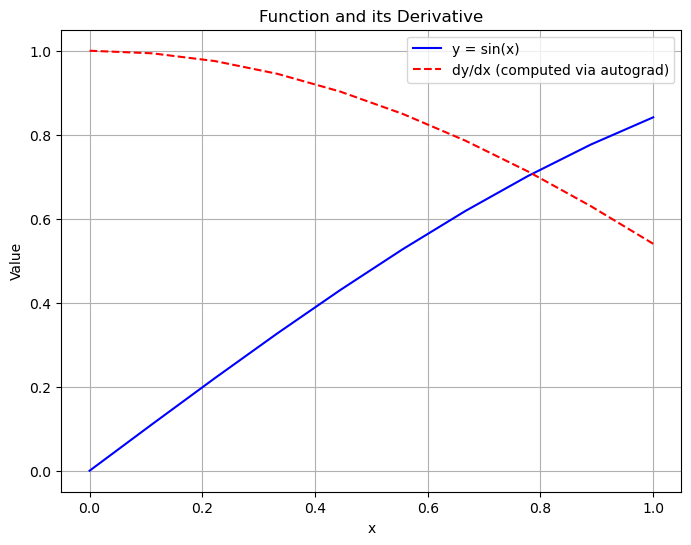

In [ ]:
import torch
import matplotlib.pyplot as plt

# create x values with `requires_grad=True` for autograd
x = torch.linspace(0, 1, 10, requires_grad=True)

# compute y = sin(x)
y = torch.sin(x)

# comp the gradient of y with respect to x
y.sum().backward()  # Backpropagation to compute gradients
x_dx = x.grad       # Retrieve the gradients (dy/dx)

# detach tensors for plotting (convert to NumPy)
x_np = x.detach().numpy()
y_np = y.detach().numpy()
x_dx_np = x_dx.detach().numpy()

# [lot the function and its derivative
plt.figure(figsize=(8, 6))

# original function y = sin(x)
plt.plot(x_np, y_np, label='y = sin(x)', color='blue')

# the derivative dy/dx = cos(x)
plt.plot(x_np, x_dx_np, label="dy/dx (computed via autograd)", color='red', linestyle='--')

plt.xlabel('x');plt.ylabel('Value');plt.legend();plt.grid(True)
plt.title('Function and its Derivative')

# Show the plot
plt.show()

Let $ f(x) = \left( \log(x^2) \cdot \sin(x) \right) + \frac{1}{x} $. Write out a dependncy graph tracing results from $x$ to $f(x)$

```     
        x
       /|\
      / | \
     /  |  \
   x^2 sin(x) 1/x
    |    |     |
 log(x^2)      |
    |          |
 log(x^2)*sin(x)|
         \     /
          \   /
           f(x)
           ```

This show how intermediate results depend on earlier computations